# **Supervised Machine Learning Algorithm**

**Naive Bayes for Classification Problems**

In [ ]:
# Import necessary libraries
import pandas as pd
import gdown
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -----------------------------------
# Step 1: Download dataset from Google Drive
# -----------------------------------

train_file_id = '1_02Q5xFwafm5F_m-RotmC7R9iSntNncA'
test_file_id = '1Pwa_HGLVjGwqr26G2Ayt7DAjGgoemjJ3'

train_dest = 'training.csv'
test_dest = 'test.csv'

gdown.download(f'https://drive.google.com/uc?id={train_file_id}', train_dest, quiet=False)
gdown.download(f'https://drive.google.com/uc?id={test_file_id}', test_dest, quiet=False)

# -----------------------------------
# Step 2: Load datasets
# -----------------------------------

training = pd.read_csv(train_dest)
test = pd.read_csv(test_dest)

print("Training Data Sample:")
print(training.head())
print("\nTest Data Sample:")
print(test.head())

print(f"\nTraining data shape: {training.shape}")
print(f"Test data shape: {test.shape}")
print(f"Features in dataset:\n{training.columns}")

# -----------------------------------
# Step 3: Prepare data for modeling
# -----------------------------------

# Separate features and target variable
X_train = training.drop(['Unnamed: 6', 'Temperature'], axis=1)
y_train = training['Unnamed: 6']
X_test = test.drop(['Unnamed: 6', 'Temperature'], axis=1)
y_test = test['Unnamed: 6']

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode target labels (if needed)
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

# -----------------------------------
# Step 4: Naive Bayes Model
# -----------------------------------

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train_enc)

print(f"\nNaive Bayes Training Accuracy: {nb_model.score(X_train_scaled, y_train_enc):.4f}")
print(f"Naive Bayes Test Accuracy: {nb_model.score(X_test_scaled, y_test_enc):.4f}")

# Predict on test set
y_pred_nb = nb_model.predict(X_test_scaled)

print("\nNaive Bayes Confusion Matrix:")
print(confusion_matrix(y_test_enc, y_pred_nb))

print("\nNaive Bayes Classification Report:")
print(classification_report(y_test_enc, y_pred_nb))

# -----------------------------------
# Step 5: Logistic Regression Model
# -----------------------------------

print("\n----------------------- LOGISTIC REGRESSION -----------------------")

logreg_model = LogisticRegression(random_state=0, max_iter=500)
logreg_model.fit(X_train_scaled, y_train_enc)

y_pred_log = logreg_model.predict(X_test_scaled)
log_accuracy = accuracy_score(y_test_enc, y_pred_log)

print(f"Logistic Regression Test Accuracy: {log_accuracy:.4f}")

print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test_enc, y_pred_log))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test_enc, y_pred_log))

Downloading...
From: https://drive.google.com/uc?id=1_02Q5xFwafm5F_m-RotmC7R9iSntNncA
To: /content/training.csv
100%|██████████| 480k/480k [00:00<00:00, 86.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Pwa_HGLVjGwqr26G2Ayt7DAjGgoemjJ3
To: /content/test.csv
100%|██████████| 162k/162k [00:00<00:00, 27.7MB/s]

Training Data Sample:
           Temperature  Humidity    Light  ...  HumidityRatio  Occupancy  Unnamed: 6
0  2015-02-04 17:51:00     23.18  27.2720  ...         721.25   0.004793           1
1  2015-02-04 17:51:59     23.15  27.2675  ...         714.00   0.004783           1
2  2015-02-04 17:53:00     23.15  27.2450  ...         713.50   0.004779           1
3  2015-02-04 17:54:00     23.15  27.2000  ...         708.25   0.004772           1
4  2015-02-04 17:55:00     23.10  27.2000  ...         704.50   0.004757           1

[5 rows x 7 columns]

Test Data Sample:
           Temperature  Humidity   Light  ...  HumidityRatio  Occupancy  Unnamed: 6
0  2015-02-02 14:19:00   23.7000  26.272  ...     749.200000   0.004764           1
1  2015-02-02 14:19:59   23.7180  26.290  ...     760.400000   0.004773           1
2  2015-02-02 14:21:00   23.7300  26.230  ...     769.666667   0.004765           1
3  2015-02-02 14:22:00   23.7225  26.125  ...     774.750000   0.004744           1
4  2015

**k-NN for Classification Problems**

Dimension of independent variables: (569, 30)
Features:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Dimension of dependent variable: (569,)

-------------- KNN MODEL --------------
Accuracy for k=1: 0.9474
Confusion Matrix:
 [[43  4]
 [ 2 65]]
Accuracy for k=2: 0.9298
Confusion Matrix:
 [[44  3]
 [ 5 62]]
Accuracy for k=3: 0.9561
Confusion Matrix:
 [[42  5]
 [ 0 67]]
Accuracy for k=4: 0.9649
Confusion Matrix:
 [[44  3]
 [ 1 66]]
Accuracy for k=5: 0.9561
Confusion Matrix:
 [[42  5]
 [

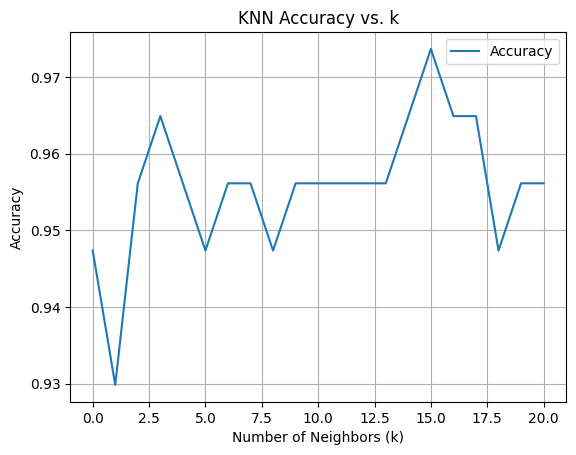


-------------- NAIVE BAYES MODEL --------------
Naive Bayes Accuracy: 0.9035
Confusion Matrix:
 [[42  5]
 [ 6 61]]

-------------- LOGISTIC REGRESSION MODEL --------------
Logistic Regression Accuracy: 0.9649
Confusion Matrix:
 [[45  2]
 [ 2 65]]


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Load the breast cancer dataset
cancer = load_breast_cancer()

# Display dataset details
print("Dimension of independent variables:", cancer.data.shape)
print("Features:\n", cancer.feature_names)
print("Dimension of dependent variable:", cancer.target.shape)

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.2, random_state=0
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Encode target labels (just to be safe, although they are already numeric)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# ----------------------- KNN MODEL -----------------------
print("\n-------------- KNN MODEL --------------")

knn_accuracies = []

for k in range(1, 22):
    # Create KNN model with k neighbors
    knn_model = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)

    # Fit model
    knn_model.fit(X_train, y_train)

    # Predict test set results
    y_pred = knn_model.predict(X_test)

    # Calculate accuracy and confusion matrix
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Accuracy for k={k}: {accuracy:.4f}")
    print("Confusion Matrix:\n", conf_matrix)

    knn_accuracies.append(accuracy)

# Best accuracy and plot
print(f"\nMaximum accuracy using KNN: {max(knn_accuracies):.4f}")

# Plot accuracy vs k
pd.DataFrame(knn_accuracies, columns=["Accuracy"]).plot(title="KNN Accuracy vs. k")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# ----------------------- NAIVE BAYES MODEL -----------------------
print("\n-------------- NAIVE BAYES MODEL --------------")

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_conf_matrix = confusion_matrix(y_test, y_pred_nb)

print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
print("Confusion Matrix:\n", nb_conf_matrix)

# ----------------------- LOGISTIC REGRESSION MODEL -----------------------
print("\n-------------- LOGISTIC REGRESSION MODEL --------------")

log_model = LogisticRegression(random_state=0, max_iter=500)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

log_accuracy = accuracy_score(y_test, y_pred_log)
log_conf_matrix = confusion_matrix(y_test, y_pred_log)

print(f"Logistic Regression Accuracy: {log_accuracy:.4f}")
print("Confusion Matrix:\n", log_conf_matrix)


**k-NN for Regression Problems**

**Code 1**

   MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0   125   256   6000   256     16    128  198  199
1    29  8000  32000    32      8     32  269  253
2    29  8000  32000    32      8     32  220  253
3    29  8000  32000    32      8     32  172  253
4    29  8000  16000    32      8     16  132  132
Null values in datset:
 MYCT     0
MMIN     0
MMAX     0
CACH     0
CHMIN    0
CHMAX    0
PRP      0
ERP      0
dtype: int64
Not available values in dataset:
 MYCT     0
MMIN     0
MMAX     0
CACH     0
CHMIN    0
CHMAX    0
PRP      0
ERP      0
dtype: int64
RMSE value for k=  1 is: 170.53920091175237
RMSE value for k=  2 is: 170.8053867965825
RMSE value for k=  3 is: 170.68403206130753
RMSE value for k=  4 is: 170.92638580710516
RMSE value for k=  5 is: 171.0933282864267
RMSE value for k=  6 is: 171.03696213458
RMSE value for k=  7 is: 171.0618990524138
RMSE value for k=  8 is: 171.1042291764394
RMSE value for k=  9 is: 171.20658826452137
RMSE value for k=  10 is: 171.25835352120393


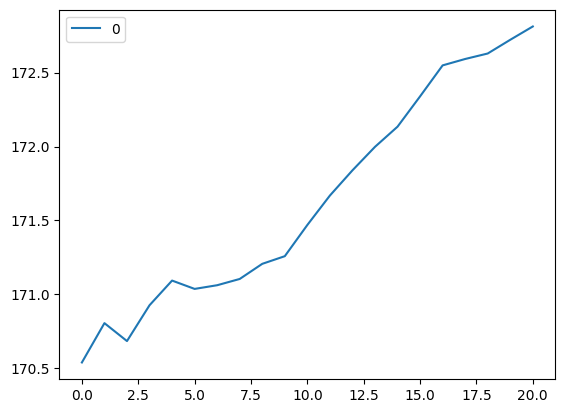

In [ ]:
#Importing libraries.
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Readin data and making approprioate changes
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data'
column_names = ['Vendor name', 'Model name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']
data = pd.read_csv(url, header=None, names=column_names)
data = data.drop(['Vendor name', 'Model name'], axis=1)
print(data.head())

#Displaying null values.
print("Null values in datset:\n", data.isnull().sum())
print("Not available values in dataset:\n", data.isna().sum())

#Using a random seed function for generating the same dataset.
np.random.seed(3000)
training, test = train_test_split(data, test_size = 0.3)

#Separating independent and dependent variables.
x_trg = training.drop('ERP', axis=1)
y_trg = training['ERP']
x_tst = test.drop('ERP', axis=1)
y_tst = test['ERP']

#Feature Scaling
scaler = StandardScaler()
x_trg = scaler.fit_transform(x_trg)
x_tst = scaler.transform(x_tst)

#Encoding categorical data values.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_trg = le.fit_transform(y_trg)
y1_tst = le.fit_transform(y_tst)

#Creating a list to store RMSE values for different values of k.
knn_rmselist = []
for K in range(21):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(x_trg, y_trg)
    pred = model.predict(x_tst)

    #Calculate RMSE for the model.
    knn_rmse = sqrt(mean_squared_error(y_tst, pred))
    knn_rmselist.append(knn_rmse)
    print("RMSE value for k= " , K , "is:", knn_rmse)

#Determining the least RMSE value.
print("The least RMSE value using kNN is: %0.4f"%min(knn_rmselist))

#Displaying RMSE of KNN models for different values of k.
curve = pd.DataFrame(knn_rmselist)
curve.plot()

#Creating a linear regression model
print("--------------------------------LINEAR REGRESSION MODEL-----------------------------")
reg = linear_model.LinearRegression()
reg.fit(x_trg, y_trg)
pred = reg.predict(x_tst)
print('Coefficient of independent variables:\n', reg.coef_)
print('Intercept in the model is:', reg.intercept_)
print("Mean squared error: %.4f"% mean_squared_error(y_tst, pred))
print('Variance score: %.4f' % reg.score(x_tst, y_tst))

**Code 2**

First 5 rows of data:
    MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0   125   256   6000   256     16    128  198  199
1    29  8000  32000    32      8     32  269  253
2    29  8000  32000    32      8     32  220  253
3    29  8000  32000    32      8     32  172  253
4    29  8000  16000    32      8     16  132  132

Missing values in dataset:
 MYCT     0
MMIN     0
MMAX     0
CACH     0
CHMIN    0
CHMAX    0
PRP      0
ERP      0
dtype: int64

KNN Regression RMSE values:
RMSE for k=1: 66.1757
RMSE for k=2: 88.0280
RMSE for k=3: 85.6058
RMSE for k=4: 91.3972
RMSE for k=5: 96.3550
RMSE for k=6: 87.0314
RMSE for k=7: 81.1840
RMSE for k=8: 83.9891
RMSE for k=9: 87.9825
RMSE for k=10: 91.1722
RMSE for k=11: 94.4391
RMSE for k=12: 97.4246
RMSE for k=13: 100.1646
RMSE for k=14: 102.5317
RMSE for k=15: 104.5071
RMSE for k=16: 107.1206
RMSE for k=17: 109.6170
RMSE for k=18: 110.9844
RMSE for k=19: 111.7067
RMSE for k=20: 113.1944
RMSE for k=21: 114.4208

Lowest RMSE achieved by KNN:

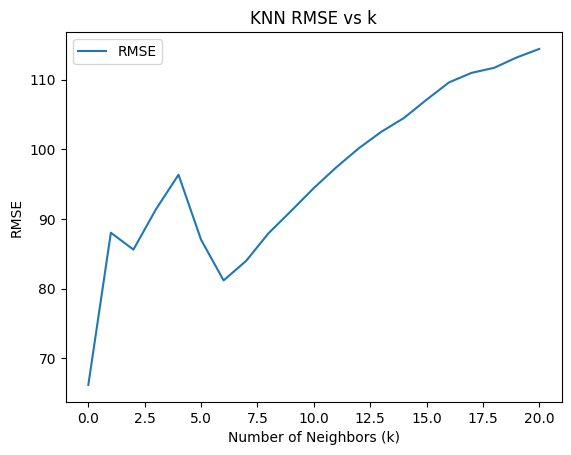


Linear Regression Model Results:
Coefficients: [ 9.42673303 11.33420161 52.01981598  6.57034851 -0.24443941 12.69412321
 79.36000068]
Intercept: 99.56164383561645
Mean Squared Error: 1632.1973
Variance Score (R^2): 0.9431


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load dataset and drop categorical columns
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data'
column_names = ['Vendor name', 'Model name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']
data = pd.read_csv(url, header=None, names=column_names)
data = data.drop(['Vendor name', 'Model name'], axis=1)

print("First 5 rows of data:\n", data.head())

# Check for missing values
print("\nMissing values in dataset:\n", data.isnull().sum())

# Split data into train and test sets with a fixed random seed
np.random.seed(3000)
training, test = train_test_split(data, test_size=0.3, random_state=3000)

# Separate features and target variable
x_trg = training.drop('ERP', axis=1)
y_trg = training['ERP']
x_tst = test.drop('ERP', axis=1)
y_tst = test['ERP']

# Feature scaling
scaler = StandardScaler()
x_trg = scaler.fit_transform(x_trg)
x_tst = scaler.transform(x_tst)

# Note: LabelEncoder should NOT be applied to continuous target variables (like ERP)
# You only encode categorical target variables, so removing this step

# KNN Regression with different k values
knn_rmselist = []
print("\nKNN Regression RMSE values:")
for K in range(1, 22):
    model = KNeighborsRegressor(n_neighbors=K)
    model.fit(x_trg, y_trg)
    pred = model.predict(x_tst)

    rmse = sqrt(mean_squared_error(y_tst, pred))
    knn_rmselist.append(rmse)
    print(f"RMSE for k={K}: {rmse:.4f}")

print(f"\nLowest RMSE achieved by KNN: {min(knn_rmselist):.4f}")

# Plot RMSE vs K
import matplotlib.pyplot as plt
pd.DataFrame(knn_rmselist, columns=['RMSE']).plot(title='KNN RMSE vs k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('RMSE')
plt.show()

# Linear Regression model
print("\nLinear Regression Model Results:")
reg = LinearRegression()
reg.fit(x_trg, y_trg)
pred = reg.predict(x_tst)

print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)
print("Mean Squared Error: %.4f" % mean_squared_error(y_tst, pred))
print("Variance Score (R^2): %.4f" % reg.score(x_tst, y_tst))



**The primary reason for the difference in model performance and results between Code 1 and Code 2 is the improper use of `LabelEncoder` on the continuous target variable `ERP` in your original code.**

In your Code 1, `LabelEncoder` was applied to `ERP`, which is a continuous numeric variable representing CPU performance. This encoding converted continuous values into arbitrary integer classes, effectively turning a regression problem into a mislabeled classification-like problem. As a result, the model trained on distorted target values, leading to poor performance reflected by a very low R² score (\~0.03) and a high mean squared error.

In contrast, the Code 2 correctly treats `ERP` as a continuous variable without any encoding, allowing the regression models (KNN Regressor and Linear Regression) to learn from the true numeric target values. This leads to substantially better model fitting, shown by a high R² score (\~0.94) and a much lower mean squared error.

**In summary:**

> *Encoding a continuous regression target with `LabelEncoder` distorts the data and drastically degrades model performance, whereas preserving the numeric nature of the target variable allows regression algorithms to produce accurate and meaningful predictions.*



**Support Vector Machines for Classification Problems**

In [ ]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

# Load the Banknote Authentication dataset directly from the URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
column_names = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
banknote = pd.read_csv(url, header=None, names=column_names)

# Display basic info
print(banknote.head())
print(banknote.info())
print(banknote['class'].value_counts())
print(f"\nDataset dimensions: {banknote.shape}")
print(f"Feature names:\n{banknote.columns}")

# Split data into train and test sets with a fixed random seed for reproducibility
np.random.seed(3000)
training, test = train_test_split(banknote, test_size=0.3, random_state=3000)

x_trg = training.drop('class', axis=1)
y_trg = training['class']
x_tst = test.drop('class', axis=1)
y_tst = test['class']

# ------------------- SUPPORT VECTOR MACHINE MODEL -------------------
print("\n----------------- SUPPORT VECTOR MACHINE MODEL -----------------")
svm_model = SVC(kernel='linear', random_state=3000)
svm_model.fit(x_trg, y_trg)
y_pred_svm = svm_model.predict(x_tst)

print(f"Training accuracy: {svm_model.score(x_trg, y_trg):.4f}")
print(f"Test accuracy: {svm_model.score(x_tst, y_tst):.4f}")
print("Confusion matrix:\n", confusion_matrix(y_tst, y_pred_svm))

# ------------------- K-NEAREST NEIGHBORS MODEL -------------------
print("\n----------------- K-NEAREST NEIGHBORS MODEL -------------------")
knn_accuracies = []

for K in range(1, 22):
    knn_model = KNeighborsClassifier(n_neighbors=K)
    knn_model.fit(x_trg, y_trg)
    y_pred_knn = knn_model.predict(x_tst)
    accuracy = accuracy_score(y_tst, y_pred_knn)
    knn_accuracies.append(accuracy)

    print(f"k={K} Accuracy: {accuracy:.4f}")
    print(f"Confusion matrix for k={K}:\n{confusion_matrix(y_tst, y_pred_knn)}")

print(f"Maximum KNN accuracy: {max(knn_accuracies):.4f}")

# ------------------- NAIVE BAYES MODEL -------------------
print("\n--------------------- NAIVE BAYES MODEL ---------------------")
nb_model = GaussianNB()
nb_model.fit(x_trg, y_trg)
y_pred_nb = nb_model.predict(x_tst)

print(f"Training accuracy: {nb_model.score(x_trg, y_trg):.4f}")
print(f"Test accuracy: {nb_model.score(x_tst, y_tst):.4f}")
print("Confusion matrix:\n", confusion_matrix(y_tst, y_pred_nb))

# ------------------- LOGISTIC REGRESSION MODEL -------------------
print("\n------------------- LOGISTIC REGRESSION MODEL -----------------")
log_model = LogisticRegression(random_state=3000, max_iter=500)
log_model.fit(x_trg, y_trg)
y_pred_log = log_model.predict(x_tst)

print(f"Training accuracy: {log_model.score(x_trg, y_trg):.4f}")
print(f"Test accuracy: {log_model.score(x_tst, y_tst):.4f}")
print("Confusion matrix:\n", confusion_matrix(y_tst, y_pred_log))

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None
class
0    762
1    610
Name: count, dtype: int64

Dataset dimensions: (1372, 5)
Feature names:
Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

----------------- SUPPORT VECTOR MACHINE MODEL -----------------
Training accuracy: 0.9896
Test accu

**Support Vector Machine for Regression Problems**

In [ ]:
# Importing libraries
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt
import numpy as np
import pandas as pd

# Reading Data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00265/CASP.csv'
column_names = ['RMSD', 'Length', 'Total_surface_area', 'Nonpolar_exposed_area', 'Polar_exposed_area',
                'Total_hydrophobic_area', 'Hydrophobic_residue_exposed_area', 'Solvent_accessible_surface_area',
                'Hydrogen_bonds', 'Class']

protein = pd.read_csv(url, header=0)
protein.columns = column_names  # Rename columns

# Display basic info
print(protein.head())
print(protein.info())
print(f"Dataset dimensions: {protein.shape}")
print(f"Variables: {protein.columns.tolist()}")

# Check for missing values
print("Null values per column:\n", protein.isnull().sum())

# Prepare train-test split
np.random.seed(3000)
training, test = train_test_split(protein, test_size=0.3)
x_trg, y_trg = training.drop('RMSD', axis=1), training['RMSD']
x_tst, y_tst = test.drop('RMSD', axis=1), test['RMSD']

# ---------------------- SUPPORT VECTOR REGRESSOR ----------------------
print("\n--- SUPPORT VECTOR REGRESSOR ---")
svr_model = LinearSVR(random_state=0, max_iter=10000)
svr_model.fit(x_trg, y_trg)
y_pred_svr = svr_model.predict(x_tst)
svr_rmse = sqrt(mean_squared_error(y_tst, y_pred_svr))
print(f"RMSE: {svr_rmse:.4f}")
print(f"Training R^2: {svr_model.score(x_trg, y_trg):.4f}")
print(f"Test R^2: {svr_model.score(x_tst, y_tst):.4f}")

# ------------------------- K-NEAREST NEIGHBORS -------------------------
print("\n--- K-NEAREST NEIGHBORS REGRESSOR ---")
knn_rmse_list = []
for k in range(1, 22):
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(x_trg, y_trg)
    y_pred_knn = knn_model.predict(x_tst)
    rmse = sqrt(mean_squared_error(y_tst, y_pred_knn))
    knn_rmse_list.append(rmse)
    print(f"k={k}, RMSE: {rmse:.4f}")
print(f"Best RMSE with kNN: {min(knn_rmse_list):.4f}")

# ------------------------- LINEAR REGRESSION -------------------------
print("\n--- LINEAR REGRESSION ---")
lr_model = LinearRegression()
lr_model.fit(x_trg, y_trg)
y_pred_lr = lr_model.predict(x_tst)
mse_lr = mean_squared_error(y_tst, y_pred_lr)
r2_train = lr_model.score(x_trg, y_trg)
r2_test = lr_model.score(x_tst, y_tst)

print(f"Training R^2: {r2_train:.4f}")
print(f"Test R^2: {r2_test:.4f}")
print(f"Coefficients: {lr_model.coef_}")
print(f"Intercept: {lr_model.intercept_}")
print(f"Mean Squared Error: {mse_lr:.4f}")


     RMSD    Length  ...  Hydrogen_bonds    Class
0  17.284  13558.30  ...             102  27.0302
1   6.021   6191.96  ...              39  38.5468
2   9.275   7725.98  ...              29  38.8119
3  15.851   8424.58  ...              70  39.0651
4   7.962   7460.84  ...              41  39.9147

[5 rows x 10 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45730 entries, 0 to 45729
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   RMSD                              45730 non-null  float64
 1   Length                            45730 non-null  float64
 2   Total_surface_area                45730 non-null  float64
 3   Nonpolar_exposed_area             45730 non-null  float64
 4   Polar_exposed_area                45730 non-null  float64
 5   Total_hydrophobic_area            45730 non-null  float64
 6   Hydrophobic_residue_exposed_area  45730 non-null  float64
 

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


RMSE: 9.0517
Training R^2: -1.1948
Test R^2: -1.1822

--- K-NEAREST NEIGHBORS REGRESSOR ---
k=1, RMSE: 7.0394
k=2, RMSE: 6.3271
k=3, RMSE: 6.0807
k=4, RMSE: 5.9749
k=5, RMSE: 5.9147
k=6, RMSE: 5.8557
k=7, RMSE: 5.8225
k=8, RMSE: 5.8093
k=9, RMSE: 5.8018
k=10, RMSE: 5.7849
k=11, RMSE: 5.7790
k=12, RMSE: 5.7798
k=13, RMSE: 5.7819
k=14, RMSE: 5.7818
k=15, RMSE: 5.7810
k=16, RMSE: 5.7926
k=17, RMSE: 5.7941
k=18, RMSE: 5.7977
k=19, RMSE: 5.7997
k=20, RMSE: 5.8022
k=21, RMSE: 5.8027
Best RMSE with kNN: 5.7790

--- LINEAR REGRESSION ---
Training R^2: 0.2780
Test R^2: 0.2921
Coefficients: [ 1.50138602e-03  1.36176886e-03  1.80011149e+01 -1.09646611e-01
 -3.45693711e-06 -2.30039034e-02 -1.26241391e-04  1.53926026e-02
 -1.09728772e-01]
Intercept: 6.026665087217497
Mean Squared Error: 26.5790


**Decision Tree Algorithm for Classification Problems**


Dataset Preview:
    season   age  child_diseases  ...  smoking  hrs_sitting  diagnosis
0   -0.33  0.69               0  ...        0         0.88          N
1   -0.33  0.94               1  ...        1         0.31          O
2   -0.33  0.50               1  ...       -1         0.50          N
3   -0.33  0.75               0  ...       -1         0.38          N
4   -0.33  0.67               1  ...       -1         0.50          O

[5 rows x 10 columns]

Dataset Shape: (100, 10)

Feature Types:
 season                   float64
age                      float64
child_diseases             int64
accident                   int64
surgical_intervention      int64
high_fevers                int64
alcohol                  float64
smoking                    int64
hrs_sitting              float64
diagnosis                 object
dtype: object

----- Decision Tree (Default) -----

Decision Tree (Default) - Training Accuracy: 0.9857, Test Accuracy: 0.7333
Confusion Matrix:
 [[22  5]
 [ 3  0]]


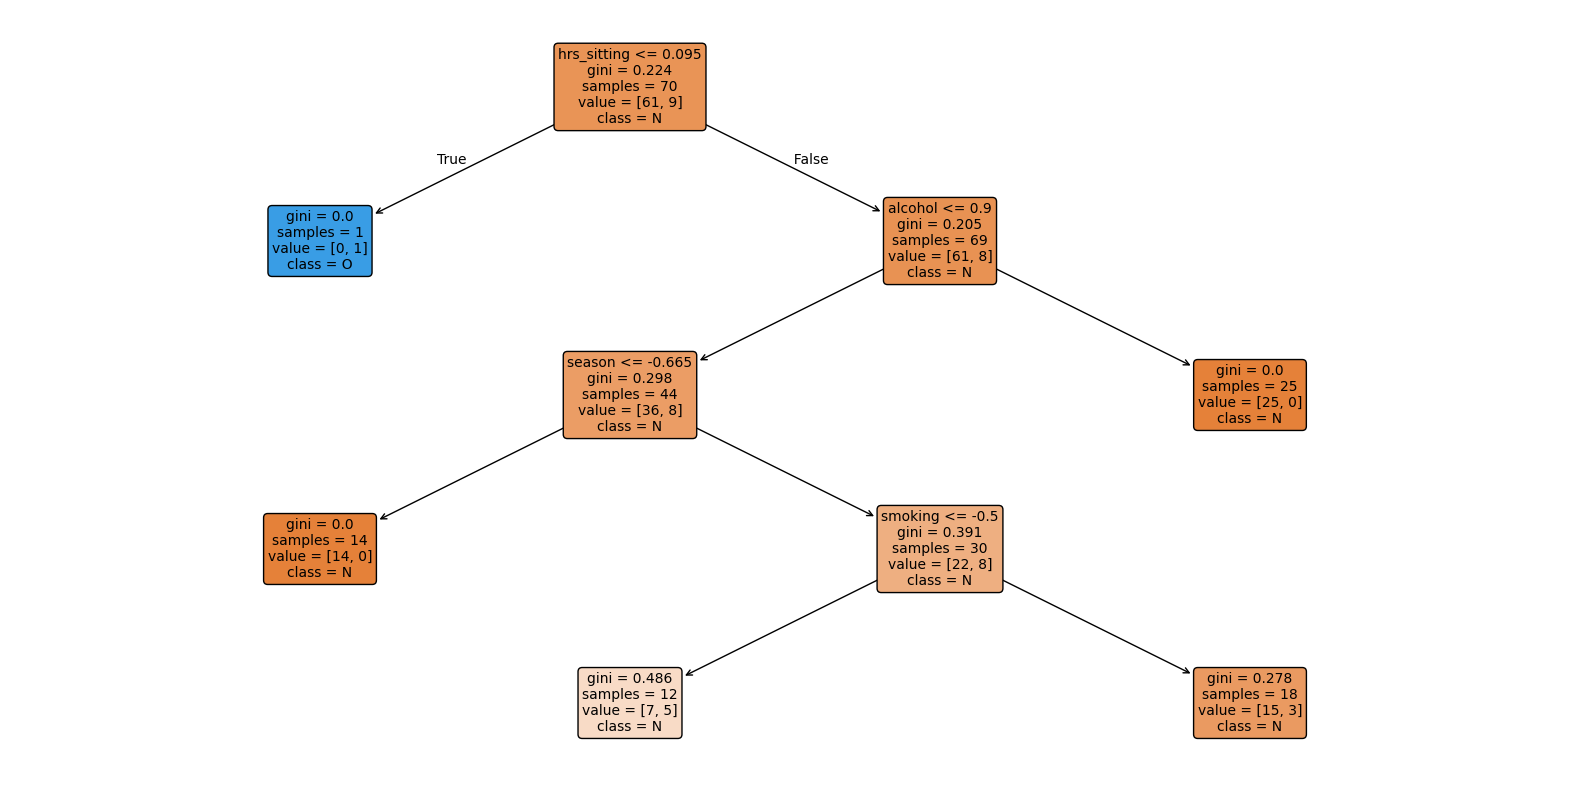

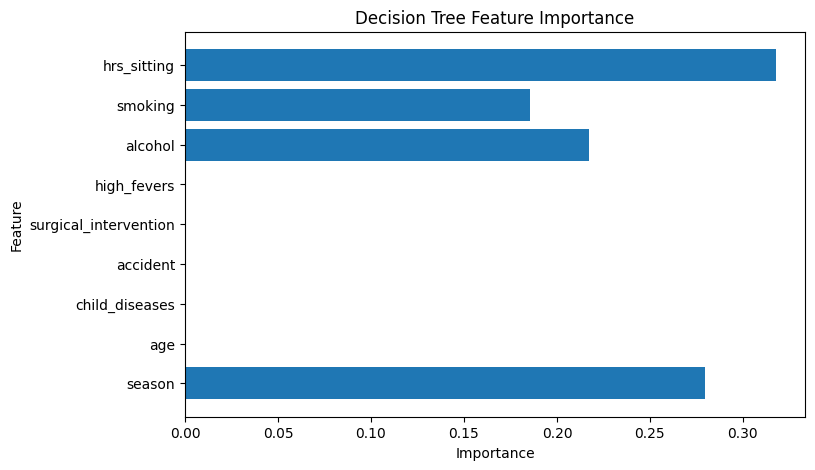



----- Decision Tree (Important Features) -----

Decision Tree (Important Features) - Training Accuracy: 0.8857, Test Accuracy: 0.8667
Confusion Matrix:
 [[26  1]
 [ 3  0]]

----- k-NN Model -----

k-NN (k=1) - Training Accuracy: 0.9571, Test Accuracy: 0.7333
Confusion Matrix:
 [[22  5]
 [ 3  0]]

k-NN (k=2) - Training Accuracy: 0.9000, Test Accuracy: 0.8667
Confusion Matrix:
 [[26  1]
 [ 3  0]]

k-NN (k=3) - Training Accuracy: 0.9000, Test Accuracy: 0.8667
Confusion Matrix:
 [[26  1]
 [ 3  0]]

k-NN (k=4) - Training Accuracy: 0.8714, Test Accuracy: 0.9000
Confusion Matrix:
 [[27  0]
 [ 3  0]]

k-NN (k=5) - Training Accuracy: 0.9000, Test Accuracy: 0.8667
Confusion Matrix:
 [[26  1]
 [ 3  0]]

k-NN (k=6) - Training Accuracy: 0.8714, Test Accuracy: 0.9000
Confusion Matrix:
 [[27  0]
 [ 3  0]]

k-NN (k=7) - Training Accuracy: 0.8714, Test Accuracy: 0.9000
Confusion Matrix:
 [[27  0]
 [ 3  0]]

k-NN (k=8) - Training Accuracy: 0.8714, Test Accuracy: 0.9000
Confusion Matrix:
 [[27  0]
 [ 3

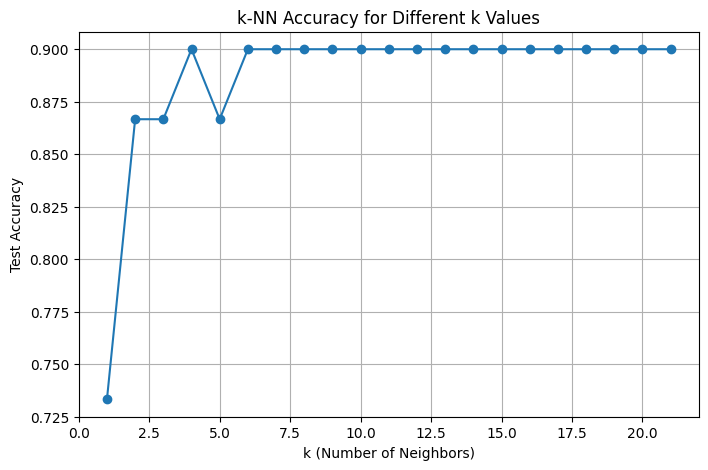


----- Naive Bayes Model -----

Naive Bayes - Training Accuracy: 0.8714, Test Accuracy: 0.8667
Confusion Matrix:
 [[26  1]
 [ 3  0]]

----- Logistic Regression Model -----

Logistic Regression - Training Accuracy: 0.8714, Test Accuracy: 0.9000
Confusion Matrix:
 [[27  0]
 [ 3  0]]


0.9

In [ ]:
# =========================
# 1. Import Required Libraries
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# =========================
# 2. Load Dataset
# =========================
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00244/fertility_Diagnosis.txt'
columns = ['season', 'age', 'child_diseases', 'accident', 'surgical_intervention',
           'high_fevers', 'alcohol', 'smoking', 'hrs_sitting', 'diagnosis']

# Read the data with comma as delimiter
fertility = pd.read_csv(url, header=None, names=columns, delimiter=',')


print("\nDataset Preview:\n", fertility.head())
print("\nDataset Shape:", fertility.shape)
print("\nFeature Types:\n", fertility.dtypes)

# =========================
# 3. Train-Test Split
# =========================
np.random.seed(3000)
X = fertility.drop('diagnosis', axis=1)
y = fertility['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3000)

# =========================
# Utility Function for Evaluation
# =========================
def evaluate_model(model, X_train, y_train, X_test, y_test, name="Model"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_train = model.score(X_train, y_train)
    acc_test = model.score(X_test, y_test)
    print(f"\n{name} - Training Accuracy: {acc_train:.4f}, Test Accuracy: {acc_test:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    return acc_test

# =========================
# 4. Decision Tree Models
# =========================
print("\n----- Decision Tree (Default) -----")
dt_default = DecisionTreeClassifier(random_state=0)
evaluate_model(dt_default, X_train, y_train, X_test, y_test, "Decision Tree (Default)")

print("\n----- Decision Tree (Max Depth=4) -----")
dt_depth4 = DecisionTreeClassifier(max_depth=4, random_state=0)
evaluate_model(dt_depth4, X_train, y_train, X_test, y_test, "Decision Tree (Depth=4)")

# Export Tree Visualization
from sklearn import tree
plt.figure(figsize=(20, 10))
tree.plot_tree(
    dt_depth4,
    feature_names=X.columns,
    class_names=["N", "O"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

# Feature Importance
plt.figure(figsize=(8, 5))
plt.barh(X.columns, dt_depth4.feature_importances_)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Decision Tree Feature Importance")
plt.show()

# =========================
# 5. Decision Tree with Important Features
# =========================
important_features = X.columns[dt_depth4.feature_importances_ > 0]
X_train_imp = X_train[important_features]
X_test_imp = X_test[important_features]

print("\n\n----- Decision Tree (Important Features) -----")
evaluate_model(DecisionTreeClassifier(max_depth=4, random_state=0),
               X_train_imp, y_train, X_test_imp, y_test,
               "Decision Tree (Important Features)")

# =========================
# 6. k-NN Model
# =========================
print("\n----- k-NN Model -----")
knn_accuracies = []
for k in range(1, 22):
    knn = KNeighborsClassifier(n_neighbors=k)
    acc = evaluate_model(knn, X_train_imp, y_train, X_test_imp, y_test, f"k-NN (k={k})")
    knn_accuracies.append(acc)

# Plot k-NN accuracy
plt.figure(figsize=(8, 5))
plt.plot(range(1, 22), knn_accuracies, marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Test Accuracy")
plt.title("k-NN Accuracy for Different k Values")
plt.grid(True)
plt.show()

# =========================
# 7. Naive Bayes Model
# =========================
print("\n----- Naive Bayes Model -----")
evaluate_model(GaussianNB(), X_train_imp, y_train, X_test_imp, y_test, "Naive Bayes")

# =========================
# 8. Logistic Regression Model
# =========================
print("\n----- Logistic Regression Model -----")
evaluate_model(LogisticRegression(random_state=0, max_iter=500),
               X_train_imp, y_train, X_test_imp, y_test,
               "Logistic Regression")

**Decision Tree for Regression Problems**

Employed         int64
GNPDeflator    float64
GNP              int64
Unemployed       int64
ArmedForces      int64
Population       int64
Year             int64
dtype: object
   Employed  GNPDeflator     GNP  Unemployed  ArmedForces  Population  Year
0     60323         83.0  234289        2356         1590      107608  1947
1     61122         88.5  259426        2325         1456      108632  1948
2     60171         88.2  258054        3682         1616      109773  1949
3     61187         89.5  284599        3351         1650      110929  1950
4     63221         96.2  328975        2099         3099      112075  1951

----- Decision Tree (Default) -----
Feature Importances:
 [1.52837434e-02 7.31292815e-01 1.30396594e-04 0.00000000e+00
 9.71814107e-02 1.56111634e-01]


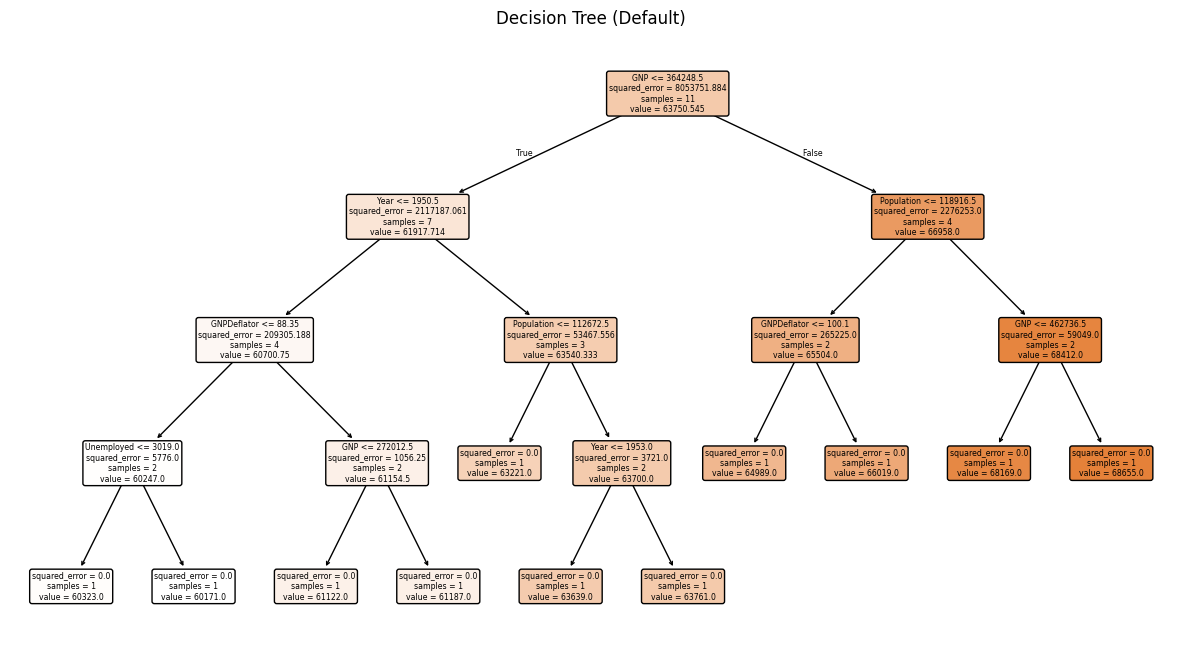

RMSE (Decision Tree Default): 1483.1489

----- Decision Tree (Max Depth=4) -----


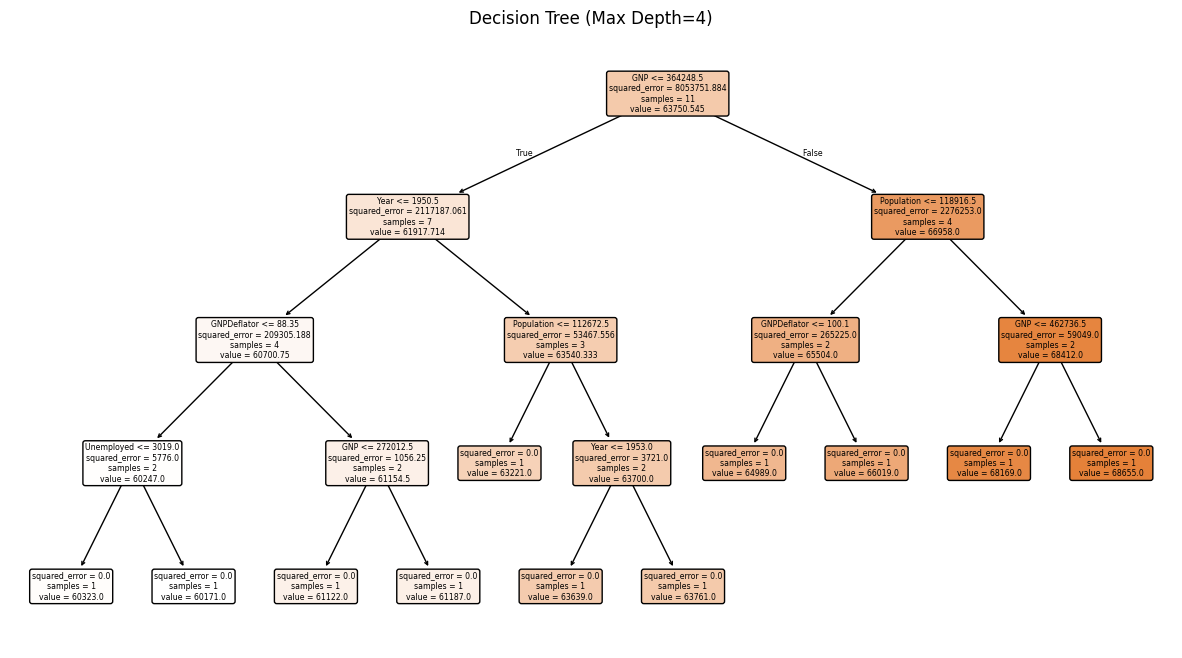

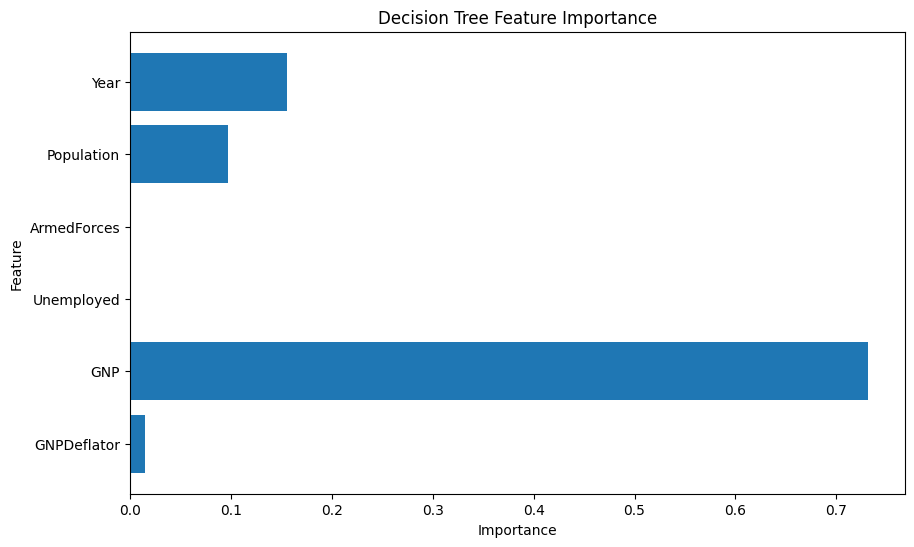

RMSE (Decision Tree Max Depth=4): 1483.1489

----- KNN Regression -----
K=1, RMSE: 1483.1489
K=2, RMSE: 1478.8750
K=3, RMSE: 1935.4761
K=4, RMSE: 2450.9200
K=5, RMSE: 2825.7689
K=6, RMSE: 3219.9283
K=7, RMSE: 3563.8800
K=8, RMSE: 4063.4084
K=9, RMSE: 4465.0207
K=10, RMSE: 4880.2528
Best RMSE using kNN: 1478.8750


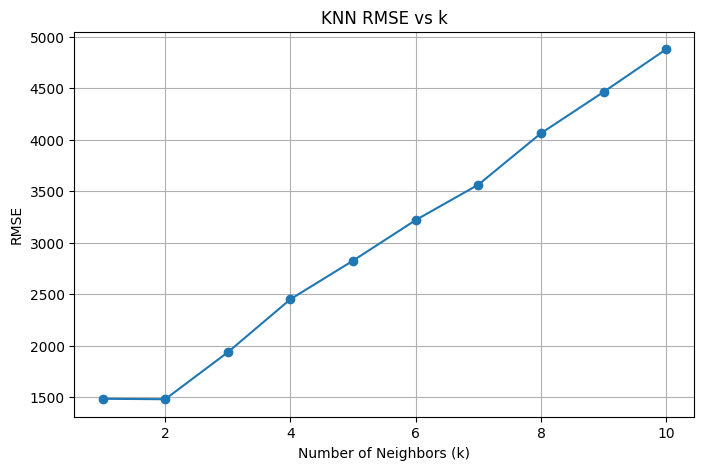


----- Linear Regression -----
Coefficients:
 [-2.34589916e+01 -4.73623078e-03 -1.51770957e+00 -7.18819381e-01
  2.93957993e-01  7.27599986e+02]
Intercept:
 -1380259.1919507803
Mean Squared Error: 644586.0194
Variance Score (R²): 0.6791


In [ ]:
# =============================
# 1. Import Libraries
# =============================
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np
import pandas as pd

# =============================
# 2. Load Dataset
# =============================
import pandas as pd
import requests
from io import StringIO

# File URL
url = 'https://itl.nist.gov/div898/strd/lls/data/LINKS/DATA/Longley.dat'

# Get raw text
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
text = response.text

# Keep only lines that contain exactly 7 numeric values
data_lines = []
for line in text.splitlines():
    parts = line.strip().split()
    if len(parts) == 7:  # Expect exactly 7 columns of data
        try:
            # Try converting all to float
            [float(x) for x in parts]
            data_lines.append(line.strip())
        except ValueError:
            pass

# Join into one clean string
cleaned_data = "\n".join(data_lines)

# Column names from NIST
cols = ['Employed', 'GNPDeflator', 'GNP', 'Unemployed', 'ArmedForces', 'Population', 'Year']

# Read into DataFrame
longley = pd.read_csv(StringIO(cleaned_data), sep=r'\s+', names=cols)

# Confirm all numeric
print(longley.dtypes)
print(longley.head())

# =============================
# 3. Train-Test Split
# =============================
np.random.seed(3000)
training, test = train_test_split(longley, test_size=0.3, random_state=3000)
x_trg, y_trg = training.drop('Employed', axis=1), training['Employed']
x_tst, y_tst = test.drop('Employed', axis=1), test['Employed']

# =============================
# 4. Decision Tree (Default)
# =============================
print("\n----- Decision Tree (Default) -----")
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(x_trg, y_trg)

print("Feature Importances:\n", dt_model.feature_importances_)

# Plot Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(dt_model, feature_names=x_trg.columns, filled=True, rounded=True)
plt.title("Decision Tree (Default)")
plt.show()

tree_pred = dt_model.predict(x_tst)
tree_rmse = sqrt(mean_squared_error(y_tst, tree_pred))
print(f"RMSE (Decision Tree Default): {tree_rmse:.4f}")

# =============================
# 5. Decision Tree (Max Depth = 4)
# =============================
print("\n----- Decision Tree (Max Depth=4) -----")
dt_model2 = DecisionTreeRegressor(max_depth=4, random_state=0)
dt_model2.fit(x_trg, y_trg)

# Plot Decision Tree with max depth
plt.figure(figsize=(15, 8))
plot_tree(dt_model2, feature_names=x_trg.columns, filled=True, rounded=True)
plt.title("Decision Tree (Max Depth=4)")
plt.show()

# Feature Importance Plot
plt.figure(figsize=(10, 6))
plt.barh(x_trg.columns, dt_model2.feature_importances_, align='center')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Decision Tree Feature Importance")
plt.show()

tree_pred2 = dt_model2.predict(x_tst)
tree_rmse2 = sqrt(mean_squared_error(y_tst, tree_pred2))
print(f"RMSE (Decision Tree Max Depth=4): {tree_rmse2:.4f}")

# =============================
# 6. KNN Regression
# =============================
print("\n----- KNN Regression -----")
knn_rmselist = []
for K in range(1, 11):  # start from 1, because k=0 is invalid
    knn_model = KNeighborsRegressor(n_neighbors=K)
    knn_model.fit(x_trg, y_trg)
    pred = knn_model.predict(x_tst)
    knn_rmse = sqrt(mean_squared_error(y_tst, pred))
    knn_rmselist.append(knn_rmse)
    print(f"K={K}, RMSE: {knn_rmse:.4f}")

print(f"Best RMSE using kNN: {min(knn_rmselist):.4f}")

# Plot KNN RMSE vs k
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), knn_rmselist, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("RMSE")
plt.title("KNN RMSE vs k")
plt.grid(True)
plt.show()

# =============================
# 7. Linear Regression
# =============================
print("\n----- Linear Regression -----")
reg = linear_model.LinearRegression()
reg.fit(x_trg, y_trg)
pred = reg.predict(x_tst)
print("Coefficients:\n", reg.coef_)
print("Intercept:\n", reg.intercept_)
print(f"Mean Squared Error: {mean_squared_error(y_tst, pred):.4f}")
print(f"Variance Score (R²): {reg.score(x_tst, y_tst):.4f}")
